In [1]:
#checking the directory
import os
print(os.listdir())

['.DS_Store', 'data.csv', 'Fifa19.ipynb', '.ipynb_checkpoints', 'data.numbers']


In [2]:
# importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import gc

In [3]:
#to get the graphs inline
%matplotlib inline

In [4]:
dataSet = pd.read_csv('data.csv')

In [5]:
dataSet.head(10)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


In [6]:
dataSet['ValueK'] = dataSet['Value'].str.replace('€','').str.replace('M','000').str.replace('K','')
dataSet['WageK'] = dataSet['Wage'].str.replace('€','').str.replace('K','')
dataSet['ReleaseClauseK'] = dataSet['Release Clause'].str.replace('€','').str.replace('M','000').str.replace('K','')
dataSet.drop(['Value','Wage','Release Clause'],axis=1,inplace=True)

In [7]:
#converting string into int
dataSet['ValueK'] = pd.to_numeric(dataSet['ValueK'])
dataSet['WageK'] = pd.to_numeric(dataSet['WageK'])
dataSet['ReleaseClauseK'] = pd.to_numeric(dataSet['ReleaseClauseK'])

In [8]:
# Splitting into Dependent and independent matrix
X = dataSet['WageK'].values
y= dataSet['ValueK'].values

In [9]:
#Reshaping the matrix into 2D matrix
X = X.reshape(-1, 1)

In [10]:
#convert the dataSet into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3)

In [11]:
#passing dataSet into Linear Regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [12]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
#create a predictor
y_predictor = regressor.predict(X_test)

In [14]:
y_predictor

array([2865.5340522 ,  111.36283301,  111.36283301, ...,  350.8559825 ,
       1548.32172998,  231.10940776])

# Plotting the Graph with Training DataSet

Text(0, 0.5, 'Market value (in Millions)')

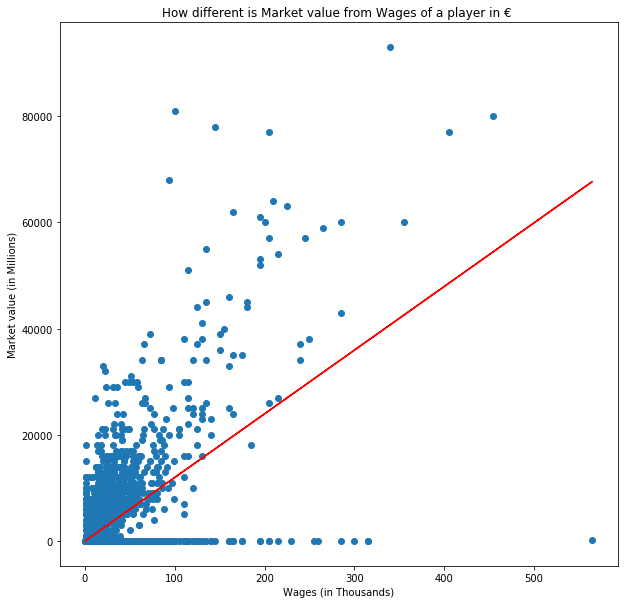

In [15]:
fig = plt.figure(figsize=(10,10))
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.title('How different is Market value from Wages of a player in € ')
plt.xlabel('Wages (in Thousands)')
plt.ylabel('Market value (in Millions)')

# Plotting the dataSet with test dataSet

Text(0, 0.5, 'Market value (in Millions)')

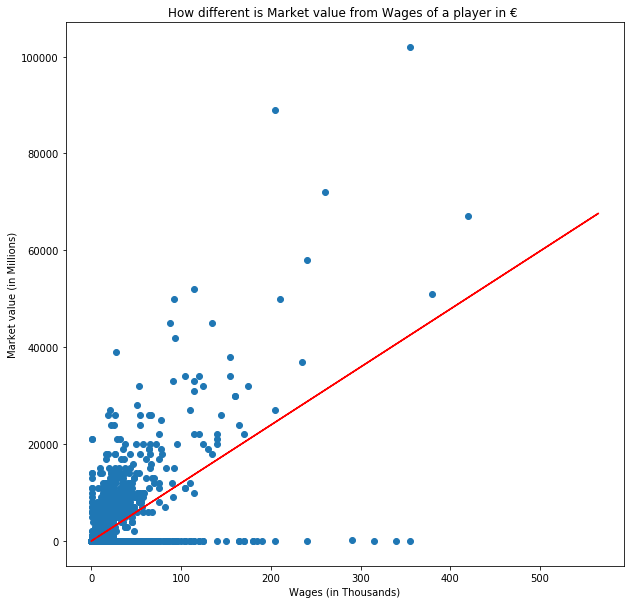

In [16]:
fig = plt.figure(figsize=(10,10))
plt.scatter(X_test, y_test)
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.title('How different is Market value from Wages of a player in € ')
plt.xlabel('Wages (in Thousands)')
plt.ylabel('Market value (in Millions)')

In [17]:
preferredFoot = dataSet.groupby('Preferred Foot')['ID'].count()

In [18]:
preferredFoot = preferredFoot/preferredFoot.sum()*100

Text(0.5, 1.0, 'Preferred Foot (in %)')

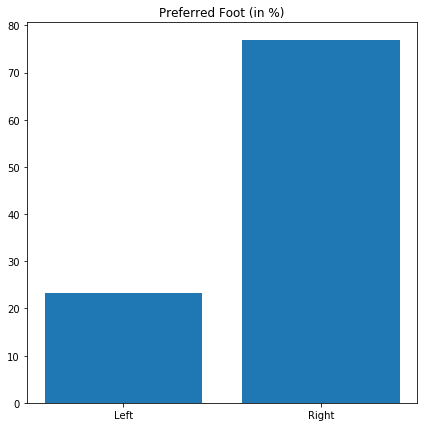

In [19]:
fig = plt.figure(figsize=(7,7))
plt.bar(x = ['Left', 'Right'], height = preferredFoot.values)
plt.title('Preferred Foot (in %)')

In [20]:
# getting the details of the dataSet
datainfo = dataSet[['Position', 'Preferred Foot']].groupby('Position')['Preferred Foot'].value_counts().unstack()

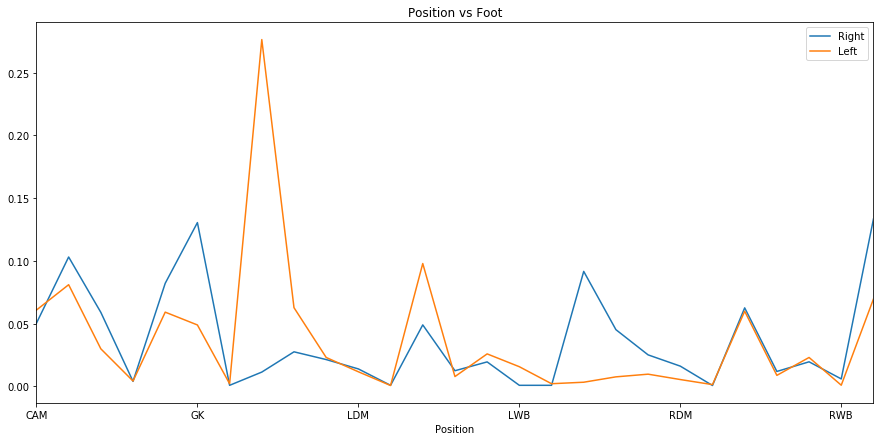

In [21]:
#Plotting the graph
datainfo['Left']= datainfo['Left']/datainfo['Left'].sum()
datainfo['Right']= datainfo['Right']/datainfo['Right'].sum()
fig, ax = plt.subplots(figsize=(15,7));
datainfo['Right'].plot(ax=ax);
datainfo['Left'].plot(ax=ax);
plt.legend(['Right','Left'])
plt.title("Position vs Foot");

## Can we predict the market value of a player based on their attributes ?

In [22]:
#following CRISP DM methodology to answer this question 
#features chosen
datavalue = dataSet[['Preferred Foot','Position','Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes','ValueK']]

#Several Attributes, Positioning and Prefered Foot are chosen as features to predict the Market Value

In [23]:
# Get one hot encoding of column - position and preferred foot
one_hot = pd.get_dummies(datavalue[['Position','Preferred Foot']])
one_hot

# Drop columns as it is now encoded
datavalue = datavalue.drop(columns = ['Position','Preferred Foot'],axis = 1)

# Join the encoded df
datavalue = datavalue.join(one_hot)
datavalue.head(10)

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Position_RCM,Position_RDM,Position_RF,Position_RM,Position_RS,Position_RW,Position_RWB,Position_ST,Preferred Foot_Left,Preferred Foot_Right
0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,...,0,0,1,0,0,0,0,0,1,0
1,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,...,0,0,0,0,0,0,0,1,0,1
2,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,...,0,0,0,0,0,0,0,0,0,1
3,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,...,0,0,0,0,0,0,0,0,0,1
4,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,...,1,0,0,0,0,0,0,0,0,1
5,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,...,0,0,0,0,0,0,0,0,0,1
6,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,...,1,0,0,0,0,0,0,0,0,1
7,77.0,93.0,77.0,82.0,88.0,87.0,86.0,84.0,64.0,90.0,...,0,0,0,0,1,0,0,0,0,1
8,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,...,0,0,0,0,0,0,0,0,0,1
9,13.0,11.0,15.0,29.0,13.0,12.0,13.0,14.0,26.0,16.0,...,0,0,0,0,0,0,0,0,0,1


##### One hot encoding is chosen above, because we want to retain the value of each column and all values are to be treated equally, it seems appropriate over other methods like 'label encoding' which gives different ranking to values

In [24]:
(datavalue.isnull().sum()/datavalue.count())*100

Crossing                0.264332
Finishing               0.264332
HeadingAccuracy         0.264332
ShortPassing            0.264332
Volleys                 0.264332
Dribbling               0.264332
Curve                   0.264332
FKAccuracy              0.264332
LongPassing             0.264332
BallControl             0.264332
Acceleration            0.264332
SprintSpeed             0.264332
Agility                 0.264332
Reactions               0.264332
Balance                 0.264332
ShotPower               0.264332
Jumping                 0.264332
Stamina                 0.264332
Strength                0.264332
LongShots               0.264332
Aggression              0.264332
Interceptions           0.264332
Positioning             0.264332
Vision                  0.264332
Penalties               0.264332
Composure               0.264332
Marking                 0.264332
StandingTackle          0.264332
SlidingTackle           0.264332
GKDiving                0.264332
          

In [25]:
datavalue.dropna(inplace= True)
datavalue.isnull().sum() #no null left

Crossing                0
Finishing               0
HeadingAccuracy         0
ShortPassing            0
Volleys                 0
Dribbling               0
Curve                   0
FKAccuracy              0
LongPassing             0
BallControl             0
Acceleration            0
SprintSpeed             0
Agility                 0
Reactions               0
Balance                 0
ShotPower               0
Jumping                 0
Stamina                 0
Strength                0
LongShots               0
Aggression              0
Interceptions           0
Positioning             0
Vision                  0
Penalties               0
Composure               0
Marking                 0
StandingTackle          0
SlidingTackle           0
GKDiving                0
                       ..
ValueK                  0
Position_CAM            0
Position_CB             0
Position_CDM            0
Position_CF             0
Position_CM             0
Position_GK             0
Position_LAM

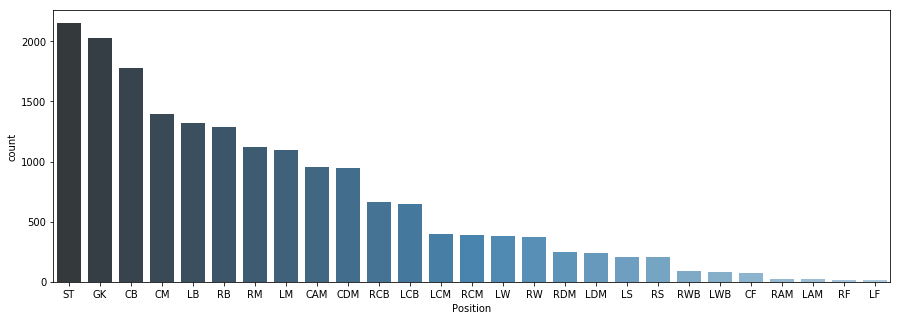

In [26]:
#plt.figure(figsize=(20,8))
plt.figure(figsize=(15,5))
sns.countplot(x = 'Position',
              data = dataSet,
              order = dataSet['Position'].value_counts().index,palette=sns.color_palette("Blues_d",n_colors=27));


### Strikers Goalkeepers and Centre backs are the top three positions.

# Top 11 Clubs with the highest median wages 

In [27]:
dataSet[['WageK','Club']].groupby(['Club'])['WageK'].median().sort_values(ascending=False).head(11)

Club
Juventus             125.0
FC Barcelona         125.0
Manchester City      120.0
Real Madrid          120.0
Manchester United    110.0
Chelsea               98.0
Liverpool             94.0
FC Bayern München     85.0
Arsenal               81.0
Tottenham Hotspur     79.0
Milan                 73.0
Name: WageK, dtype: float64

# Top 11 Players with the highest Release Clause 

In [28]:
dataSet[['ReleaseClauseK','Name']].sort_values(by='ReleaseClauseK',ascending=False)['Name'].head(11).reset_index(drop=True)

0           L. Suárez
1             G. Bale
2         David Silva
3           E. Cavani
4          O. Dembélé
5     Bruno Fernandes
6            M. Depay
7          Y. Brahimi
8          F. Thauvin
9             M. Reus
10         Iago Aspas
Name: Name, dtype: object